# Brief frequentist inference refreshment!

- Create a random variable with mean 5 and standard deviation 1.5, size 10k
- Create 1000 random samples of 100 elements (without replacement)
- Plot sampling distribution
- Estimate standard errors 
  
- Estimate and plot confidence intervals

# Libraries

In [5]:
library(data.table)
library(ggplot2)

set.seed(123)
options(repr.plot.width=8, repr.plot.height=8)

# Some formulas

### Mean

$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$ 

###  Standard deviation

$\sigma =\sqrt{\frac{\sum (x_i-\mu)^2}{n-1}}$

### Standard error 

$SE = \frac{\sigma}{\sqrt{n}}$


# Creating a fake normal variable

In [6]:
y = rnorm(10000, 5, 1.5)
summary(y)
print(paste0('Standard deviation: ', round(sd(y), 3)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -0.768   3.998   4.983   4.996   6.010  10.772 

[1] "Standard deviation: 1.498"


In [7]:
head(y)

[1] 4.159287 4.654734 7.338062 5.105763 5.193932 7.572597

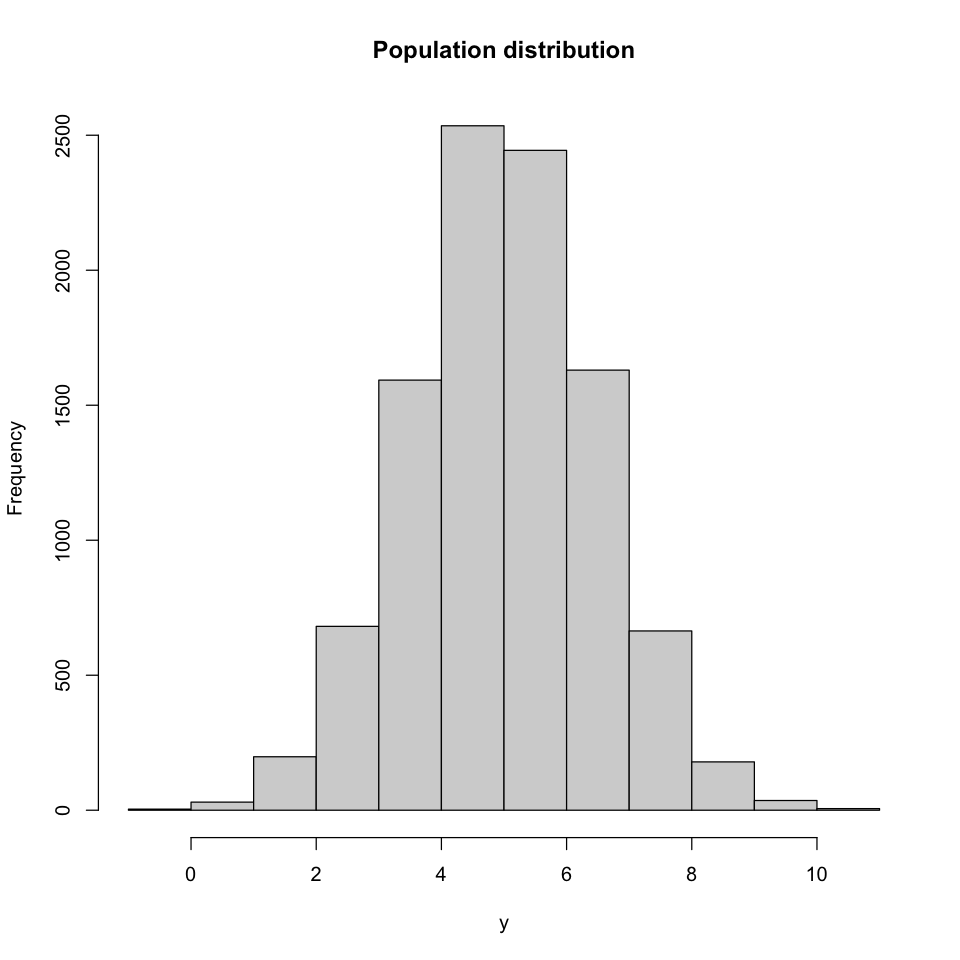

In [8]:
hist(y, main='Population distribution')

## Run multiple samples (cloud of potential values)

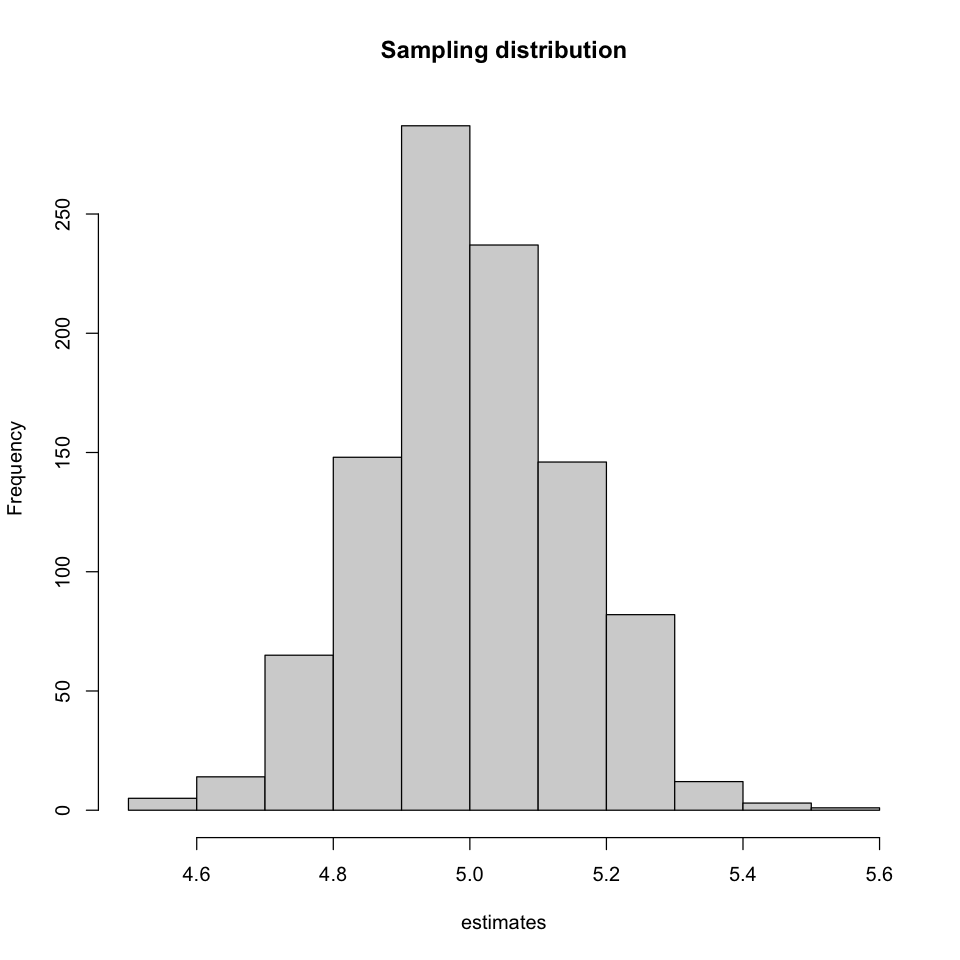

In [9]:
estimates = NULL
samples = list()
for (i in 1:1000) {
    samples[[i]] = sample(y, 100)
    estimates = c(estimates, mean(samples[[i]]))
}
hist(estimates, main = 'Sampling distribution')

In [10]:
# This is a sampling function
createSamples = function(nsamples=1000, samplesize=100, population, seed=123) {
    set.seed(seed)
    estimates = NULL
    samples = list()
    for (i in 1:nsamples) {
        samples[[i]] = sample(population, samplesize)
        estimates = c(estimates, mean(samples[[i]]))
    }
    return(list('estimates'=estimates, 'samples'=samples))
}
results = createSamples(population=y)

In [11]:
length(results)

[1] 2

In [12]:
str(results)

List of 2
 $ estimates: num [1:1000] 4.81 5.1 5.04 5.2 5.03 ...
 $ samples  :List of 1000
  ..$ : num [1:100] 3.21 8.06 4.54 4 3.45 ...
  ..$ : num [1:100] 4.53 4.49 6.8 6.07 3.86 ...
  ..$ : num [1:100] 5.24 3.35 4.35 2.88 5.43 ...
  ..$ : num [1:100] 5.31 4.16 4.1 6.66 6.56 ...
  ..$ : num [1:100] 6.04 8.56 5.32 5.21 4.68 ...
  ..$ : num [1:100] 4.91 3.7 5.26 4.92 6.05 ...
  ..$ : num [1:100] 3.98 5.19 4.43 5.92 5.72 ...
  ..$ : num [1:100] 6.02 3.8 4.39 4.89 3.87 ...
  ..$ : num [1:100] 3.98 6.68 4.87 9.91 5.57 ...
  ..$ : num [1:100] 3.32 4.87 4.54 6.81 6.84 ...
  ..$ : num [1:100] 2.9 6.43 6.27 4.21 3.42 ...
  ..$ : num [1:100] 5.73 8.59 2.76 3.34 2.99 ...
  ..$ : num [1:100] 7.97 5.24 7.04 6.75 3.16 ...
  ..$ : num [1:100] 5.18 3.48 3.23 5.92 5.19 ...
  ..$ : num [1:100] 4.96 5.55 5.86 4.34 5.77 ...
  ..$ : num [1:100] 4.11 8.47 5.41 4.7 6.91 ...
  ..$ : num [1:100] 5.94 6.66 6.39 3.94 3.75 ...
  ..$ : num [1:100] 7.09 5.3 4.36 6.69 4.51 ...
  ..$ : num [1:100] 5.09 4.95 8.31 5.3

In [13]:
head(results$estimates)

[1] 4.805346 5.104712 5.043447 5.200634 5.030226 4.938671

In [14]:
summary(results$estimates)
print(paste0('Standard error from sampling distribution: ', round(sd(results$estimates), 3)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.535   4.896   5.006   5.001   5.105   5.462 

[1] "Standard error from sampling distribution: 0.148"


## Let's now look just to one sample, what we would get in reality

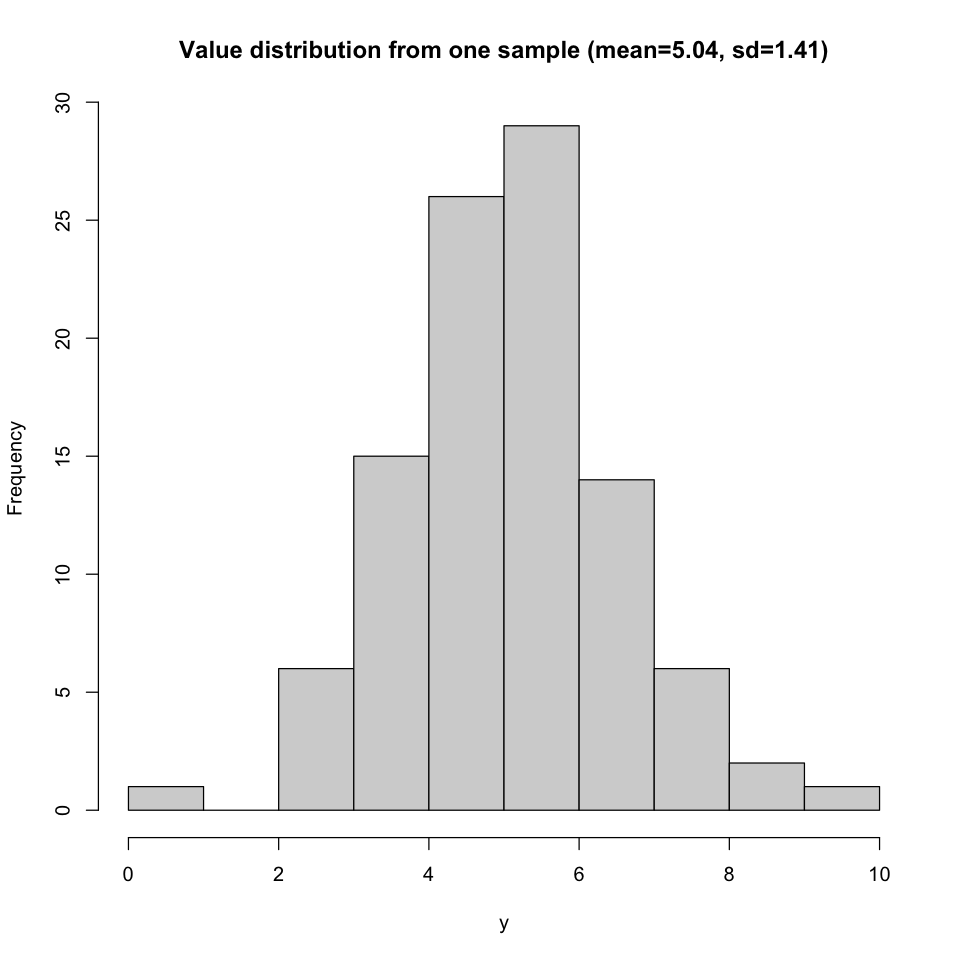

In [15]:
example = results[['samples']][[3]]

hist(example, 
    main=paste0('Value distribution from one sample (mean=', round(mean(example), 2), 
    ', sd=', round(sd(example), 2), ')'), 
    xlab='y', breaks=6)

## Compute the standard error from a sample


In [16]:
se = sd(example) / sqrt(length(example))
print(paste0('Standard error: ', round(se, 3)))

[1] "Standard error: 0.141"


## Let's get a confidence interval (CI) with 95% of confidence

- Margin of error (MOE)


$MOE= z * \sqrt{\frac{\sigma^2}{n}}$

$MOE= z * SE$

In [17]:
z = qnorm(0.975)
print(paste0('z-score: ', round(z, 3)))

moe = z * se
print(paste0('CI: [', round(mean(example) - moe, 4), ' ; ', round(mean(example) + moe, 4), ']'))
print(paste0('Point estimate: ', round(mean(example), 3)))

[1] "z-score: 1.96"
[1] "CI: [4.7669 ; 5.32]"
[1] "Point estimate: 5.043"


In [18]:
# Let's compute the CI for all samples
dt = data.table()
for (i in seq_along(results[['samples']])) {
    temp = results[['samples']][[i]]
    se = sd(temp) / sqrt(length(temp))
    moe = z * se
    temp = data.table(y_est=mean(temp), se=se, moe=moe, 
        lower=mean(temp) - moe, upper=mean(temp) + moe)
    dt = rbind(dt, temp)
}

setorder(dt, y_est)
dt[, seq := 1:.N]
dt[, include_true_value := factor(ifelse(lower < mean(y) & upper > mean(y), 1, 0), labels=c('no', 'yes'))]
prop.table(table(dt$include_true_value))


   no   yes 
0.041 0.959 

In [19]:
head(dt)

y_est,se,moe,lower,upper,seq,include_true_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
4.534563,0.1466796,0.2874867,4.247076,4.822050,1,no
4.549083,0.1463749,0.2868895,4.262194,4.835973,2,no
4.558687,0.1349147,0.2644279,4.294260,4.823115,3,no
4.582614,0.1441421,0.2825133,4.300101,4.865127,4,no
4.624990,0.1586482,0.3109447,4.314045,4.935934,5,no
4.625080,0.1467679,0.2876598,4.337421,4.912740,6,no


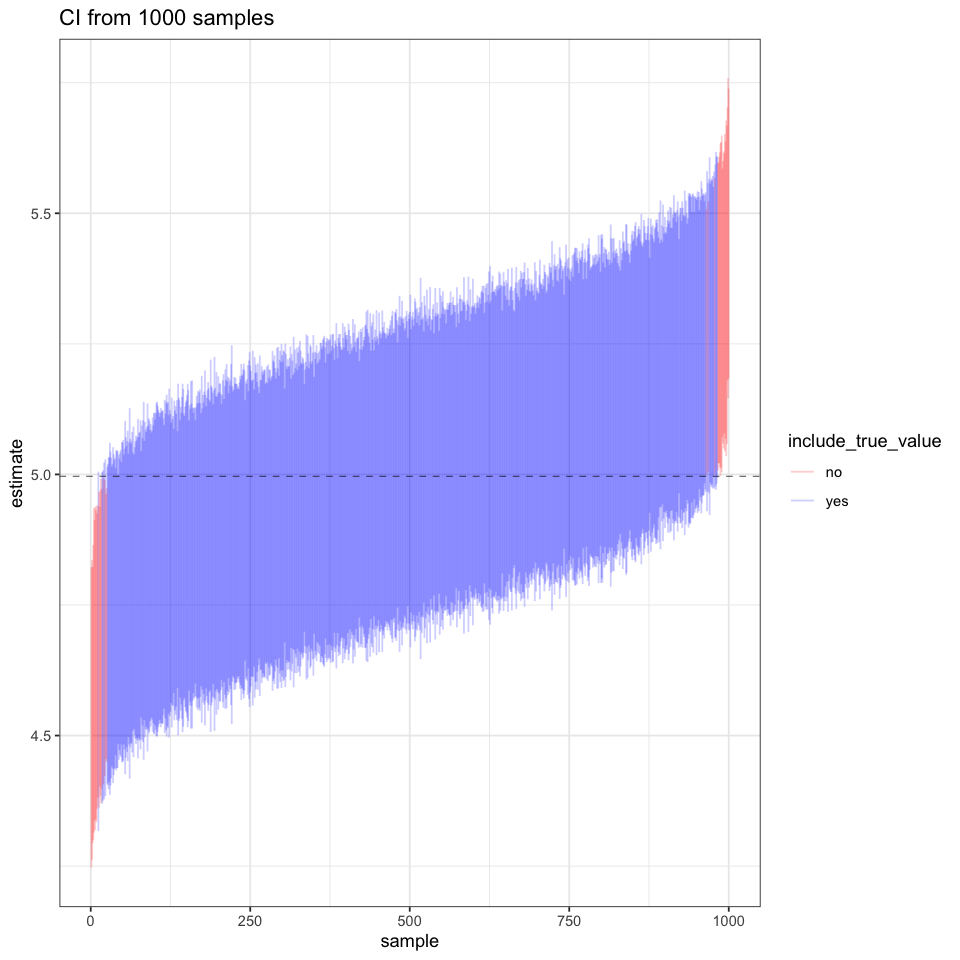

In [20]:
ggplot(dt, aes(x=seq, y=y_est, color=include_true_value)) + 
    geom_errorbar(aes(ymin=lower, ymax=upper), alpha=0.2, width=.1) + 
    theme_bw() + 
    scale_color_manual(values=c('yes'='blue','no'='red')) +
    labs(title='CI from 1000 samples', x='sample', y='estimate') + 
    geom_hline(yintercept=mean(y), color='black', linetype='dashed', linewidth=0.2)

# What about a proportion?

The standard deviation for a proportion can be computed as: 

$\sigma= \sqrt{p(1-p)}$

In [21]:
# simulate from a binomial distribution
bm = rbinom(10000, 1, 0.3)
print(paste0('Standard deviation: ', round(sd(bm), 8)))

[1] "Standard deviation: 0.45983495"


In [22]:
prop.table(table(bm))
p = prop.table(table(bm))[2]
print(paste0('Standard deviation: ', round(sqrt(p*(1-p)), 8)))

bm
     0      1 
0.6964 0.3036 

[1] "Standard deviation: 0.45981196"


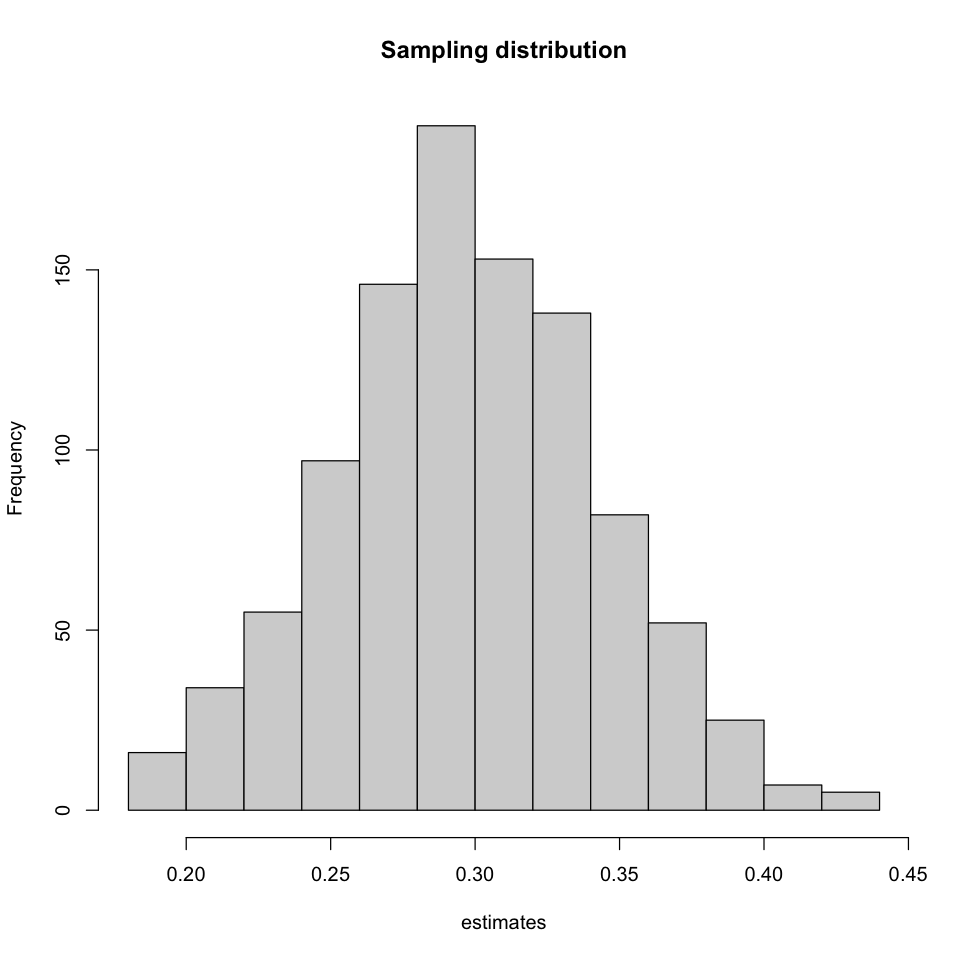

In [23]:
estimates = NULL
samples = list()
for (i in 1:1000) {
    samples[[i]] = sample(bm, 100)
    estimates = c(estimates, mean(samples[[i]]))
}

hist(estimates, main = 'Sampling distribution')

In [24]:
summary(estimates)
print(paste0('Standard error from sampling distribution: ', round(sd(estimates), 3)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1800  0.2700  0.3000  0.3023  0.3300  0.4400 

[1] "Standard error from sampling distribution: 0.045"


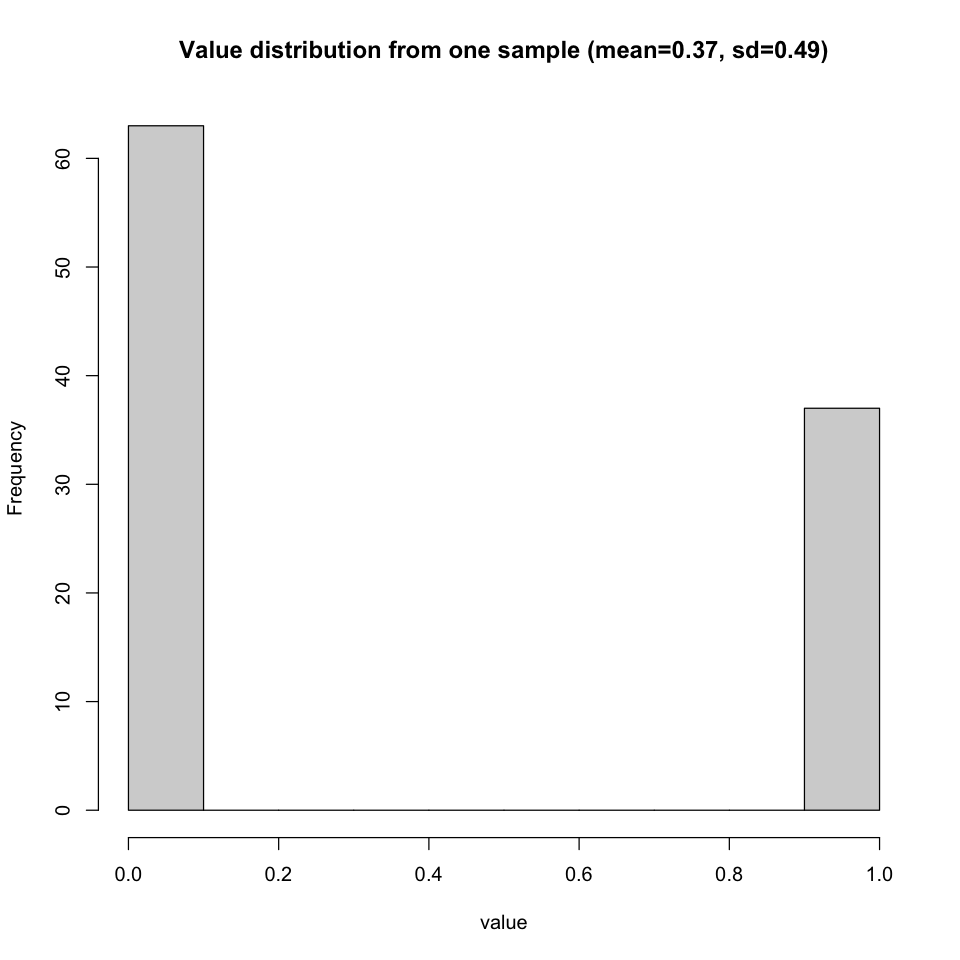

In [25]:
example = samples[[3]]
hist(example, 
    main=paste0('Value distribution from one sample (mean=', 
    round(mean(example), 2), ', sd=', round(sd(example), 2), ')'), 
    xlab='value')

In [27]:
p = prop.table(table(example))[2]
print(paste0('Standard deviation: ', round(sqrt(p*(1-p)), 8)))

[1] "Standard deviation: 0.48280431"


In [28]:
print(paste0('Standard error from sample: ', 
    round( sqrt( p*(1-p)/length(example)), 8)))

[1] "Standard error from sample: 0.04828043"


In [29]:
dt = data.table()
for (i in seq_along(samples)) {
    sp = prop.table(table(samples[[i]]))[2]
    se  = sqrt(sp*(1-sp)/length(samples[[i]]))
    moe = z * se
    temp = data.table(p=sp, se=se, moe=moe, lower=sp-moe, upper=sp+moe)
    dt = rbind(dt, temp)
}

setorder(dt, p)
dt[, seq := 1:.N]
dt[, include_true_value := factor(ifelse(lower < mean(bm) & upper > mean(bm), 1, 0), labels=c('no', 'yes'))]
prop.table(table(dt$include_true_value))


   no   yes 
0.071 0.929 

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


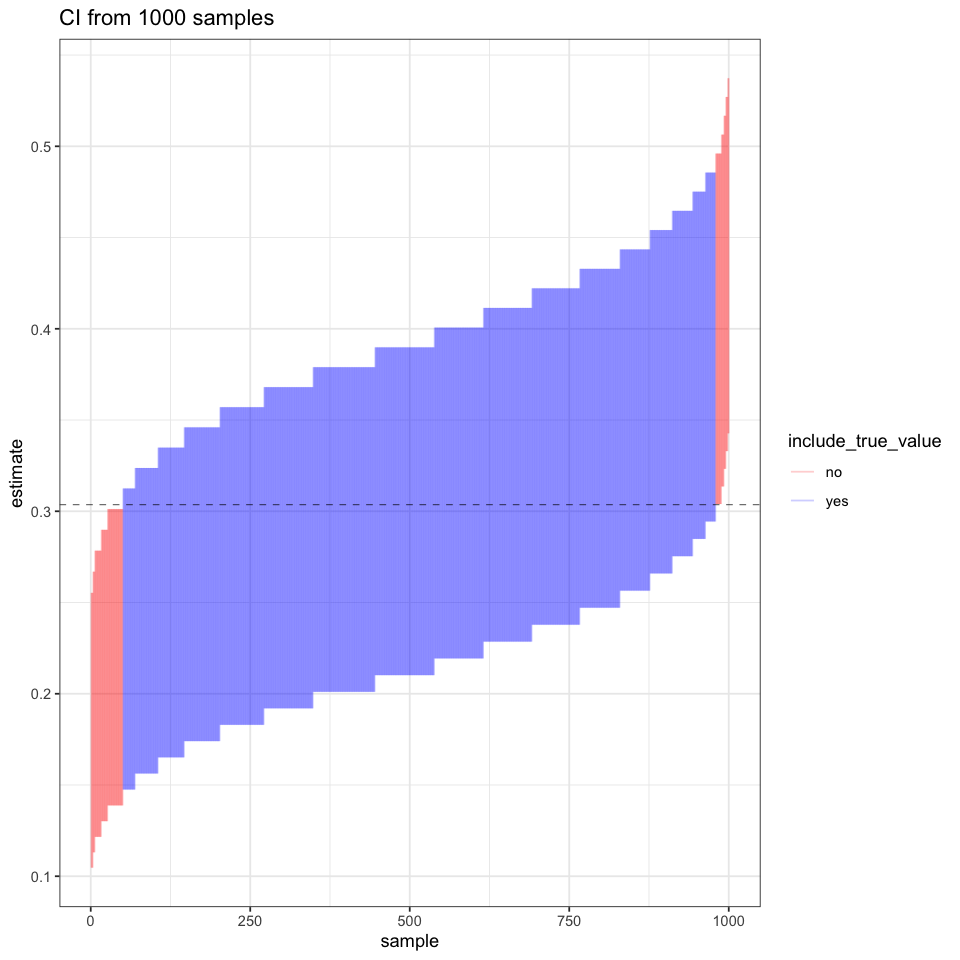

In [30]:
ggplot(dt, aes(x=seq, y=p, color=include_true_value)) + 
    geom_errorbar(aes(ymin=lower, ymax=upper), alpha=0.2, width=.1) + 
    theme_bw() + 
    scale_color_manual(values=c('yes'='blue','no'='red')) +
    labs(title='CI from 1000 samples', x='sample', y='estimate') + 
    geom_hline(yintercept=mean(bm), color='black', linetype='dashed', size=0.2)

# What about a count distribution (e.g., poisson)?

- In general used to model count data
- It creates some skewed distribution
- [See more details here](https://www.statology.org/poisson-distribution/)


In [119]:
ps = rpois(10000, 1.5)
summary(ps)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   1.493   2.000   7.000 

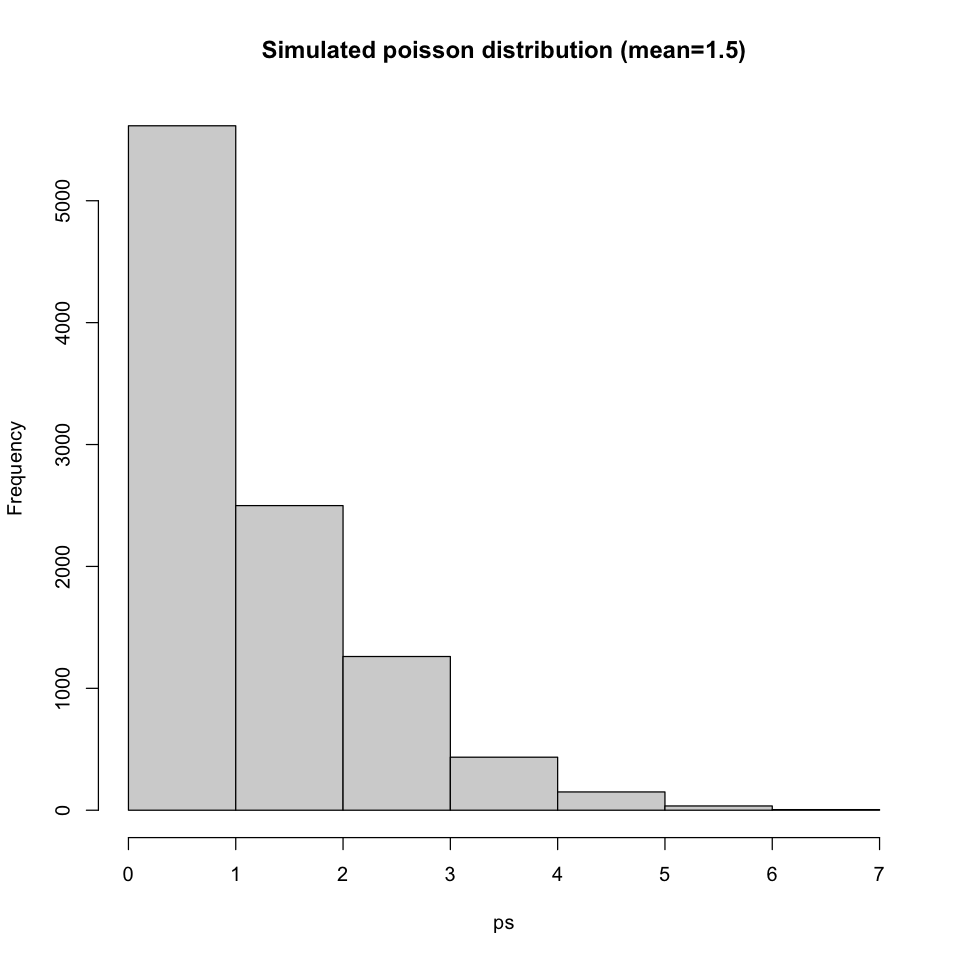

In [120]:
hist(ps, main = 'Simulated poisson distribution (mean=1.5)', breaks=9)

In [121]:
print(paste0('Standard deviation: ', round(sqrt(mean(ps)), 3)))

[1] "Standard deviation: 1.222"


## Let's create samples to see the strength of the central limit theorem

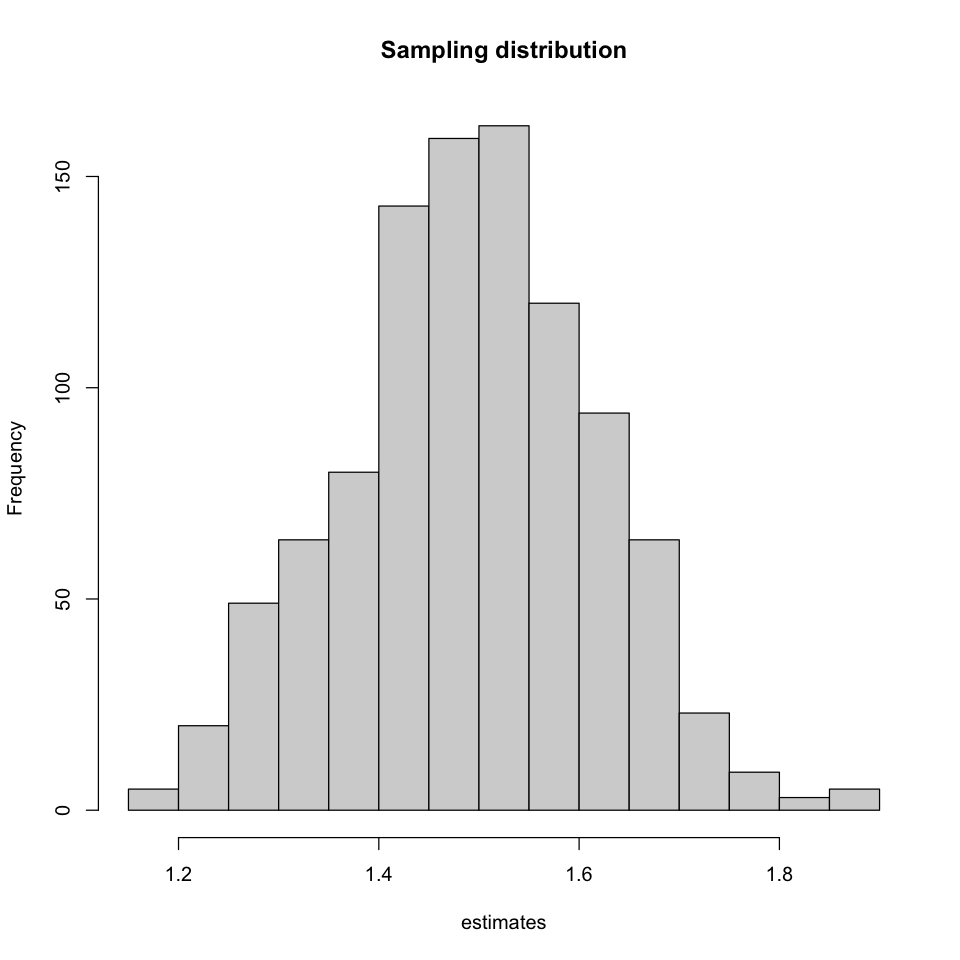

In [122]:
estimates = NULL
samples = list()
for (i in 1:1000) {
    samples[[i]] = sample(ps, 100)
    estimates = c(estimates, mean(samples[[i]]))
}

hist(estimates, main = 'Sampling distribution')

In [123]:
print(paste0('Standard error from sampling distribution: ', round(sqrt(mean(estimates)), 3)))

[1] "Standard error from sampling distribution: 1.223"


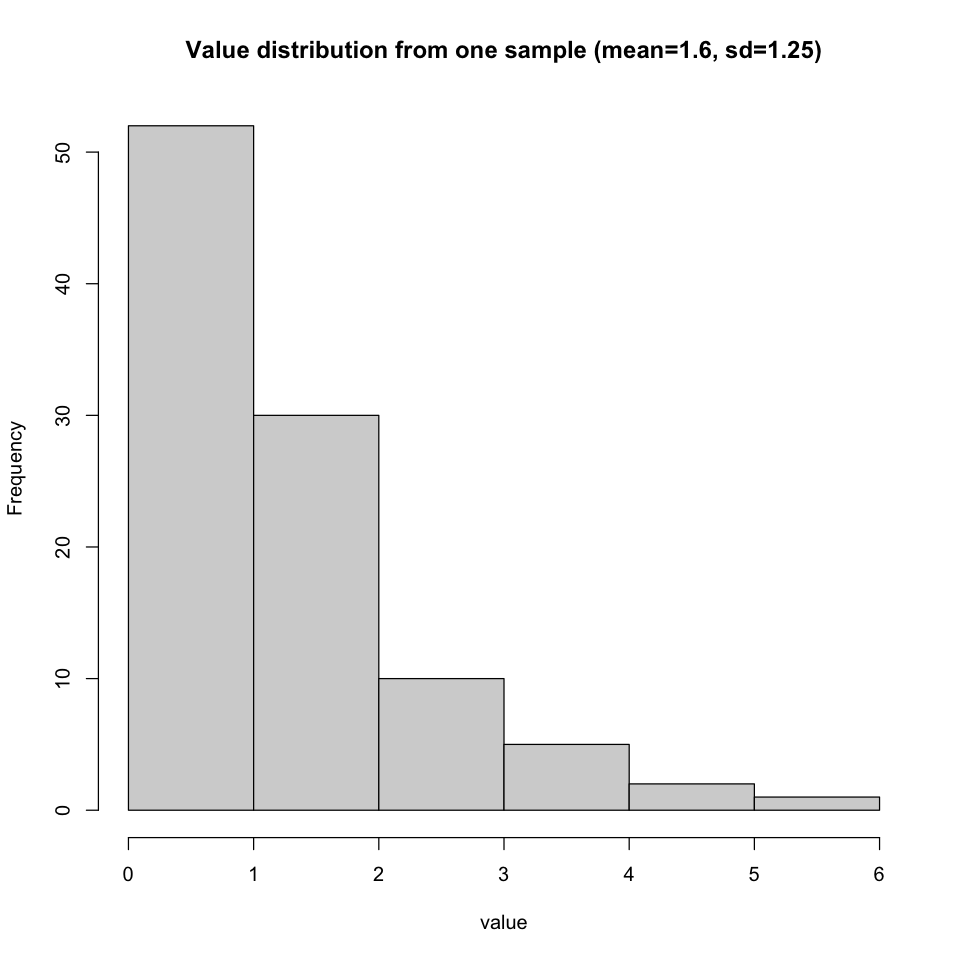

In [124]:
example = samples[[10]]
hist(example, 
    main=paste0('Value distribution from one sample (mean=', round(mean(example), 2), ', sd=', round(sd(example), 2), ')'), 
    xlab='value', breaks=5)

In [125]:
se  = sd(example) / sqrt(length(example))
print(paste0('Standard error from sample: ', round(se, 3)))

[1] "Standard error from sample: 0.125"


In [126]:
dt = data.table()
for (i in seq_along(samples)) {
    se  = sd(samples[[i]]) / sqrt(length(samples[[i]]))
    moe = z * se
    temp = data.table(y=mean(samples[[i]]), se=se, moe=moe, lower=mean(samples[[i]]) - moe, upper=mean(samples[[i]]) + moe)
    dt = rbind(dt, temp)
}

setorder(dt, y)
dt[, seq := 1:.N]
dt[, include_true_value := factor(ifelse(lower < mean(ps) & upper > mean(ps), 1, 0), labels=c('no', 'yes'))]
prop.table(table(dt$include_true_value))


   no   yes 
0.057 0.943 

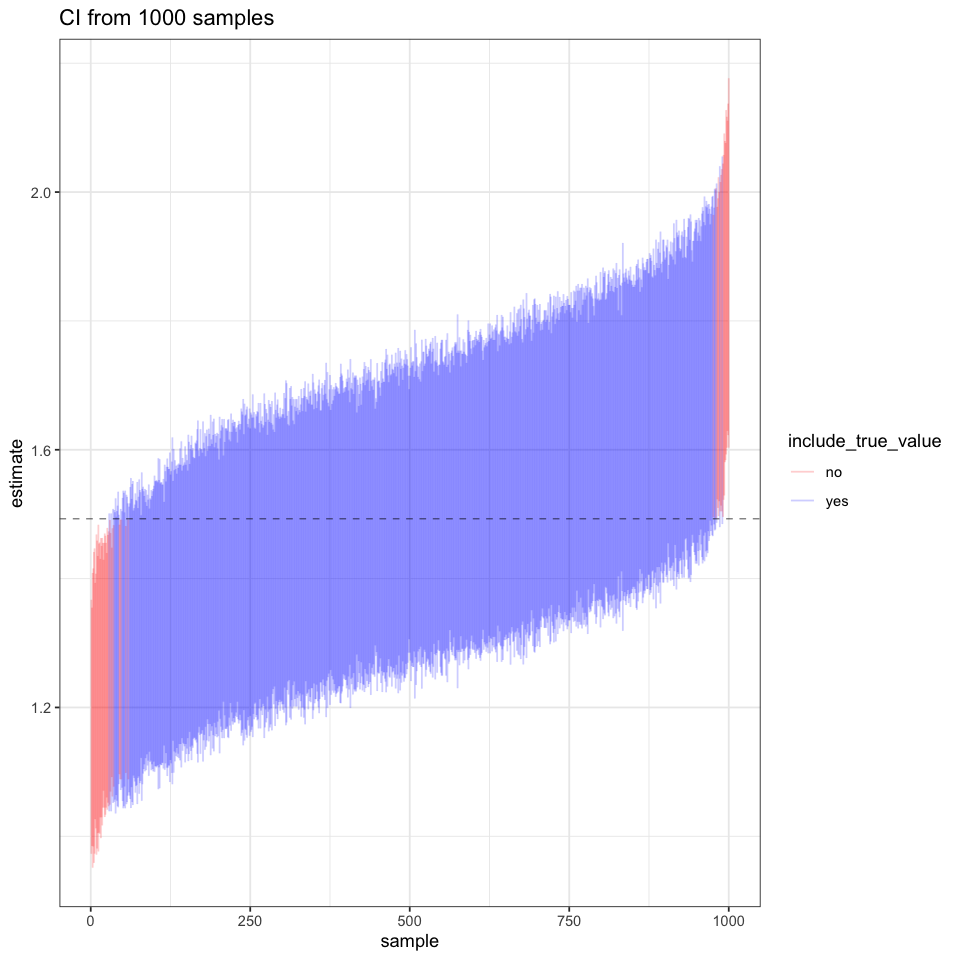

In [127]:
ggplot(dt, aes(x=seq, y=y, color=include_true_value)) + 
    geom_errorbar(aes(ymin=lower, ymax=upper), alpha=0.2, width=.1) + 
    theme_bw() + 
    scale_color_manual(values=c('yes'='blue','no'='red')) +
    labs(title='CI from 1000 samples', x='sample', y='estimate') + 
    geom_hline(yintercept=mean(ps), color='black', linetype='dashed', size=0.2)

# If we want to estimate a tiny proportion... 

In [156]:
# simulate from a binomial distribution
bm = rbinom(100000, 1, 0.03)
summary(bm)
print(paste0('Standard deviation: ', round(sd(bm), 8)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.03002 0.00000 1.00000 

[1] "Standard deviation: 0.17064317"


In [157]:
p = prop.table(table(bm))[2]
print(paste0('Standard deviation population: ', round(sqrt(p*(1-p)), 8)))

[1] "Standard deviation population: 0.17064231"


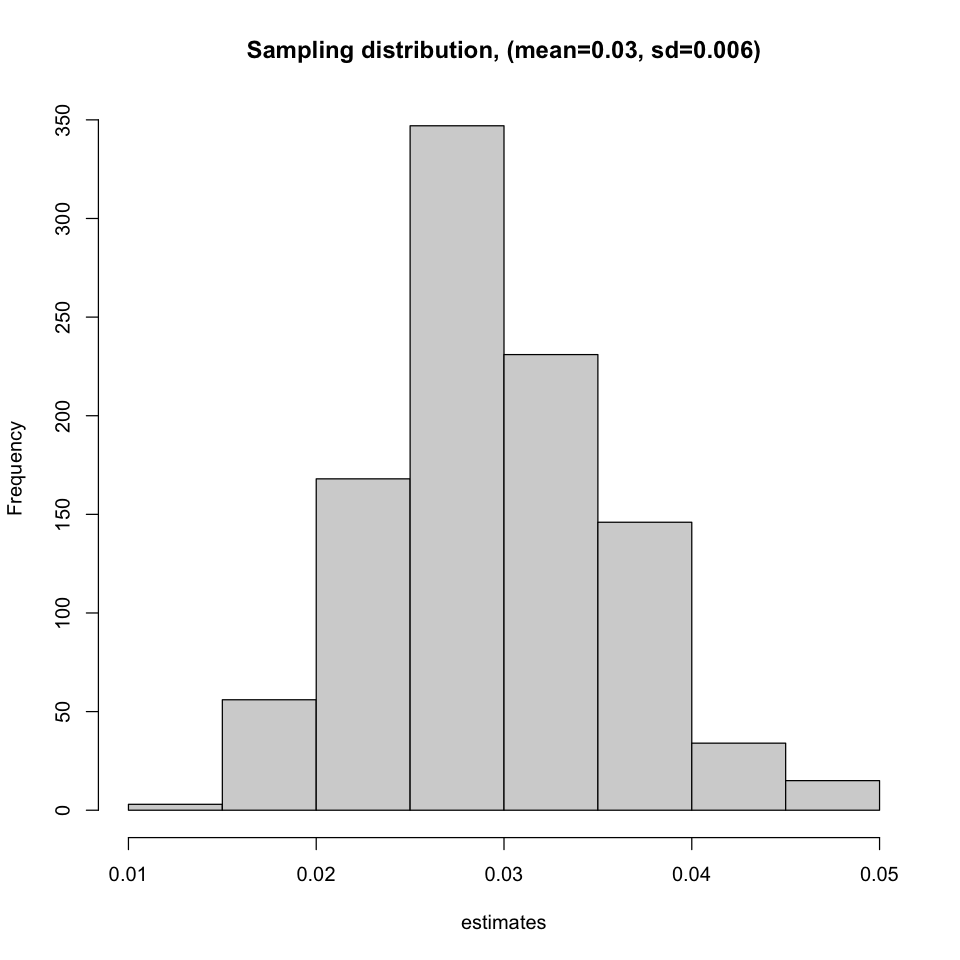

In [164]:
estimates = NULL
samples = list()
for (i in 1:1000) {
    samples[[i]] = sample(bm, 700)
    estimates = c(estimates, mean(samples[[i]]))
}

hist(estimates, main = paste0('Sampling distribution, (mean=', round(mean(estimates),3), ', sd=', round(sd(estimates), 3), ')'))

In [165]:
dt = data.table()
for (i in seq_along(samples)) {
    se  = sd(samples[[i]]) / sqrt(length(samples[[i]]))
    moe = z * se
    temp = data.table(y=mean(samples[[i]]), se=se, moe=moe, lower=mean(samples[[i]]) - moe, upper=mean(samples[[i]]) + moe)
    dt = rbind(dt, temp)
}

setorder(dt, y)
dt[, seq := 1:.N]
dt[, include_true_value := ifelse(lower < p & upper > p, 1, 0)]
dt[, include_true_value := ifelse(y==0, 0, include_true_value)]
dt[, include_true_value := factor(include_true_value, labels=c('no', 'yes'))]
prop.table(table(dt[se!=0]$include_true_value))


   no   yes 
0.049 0.951 

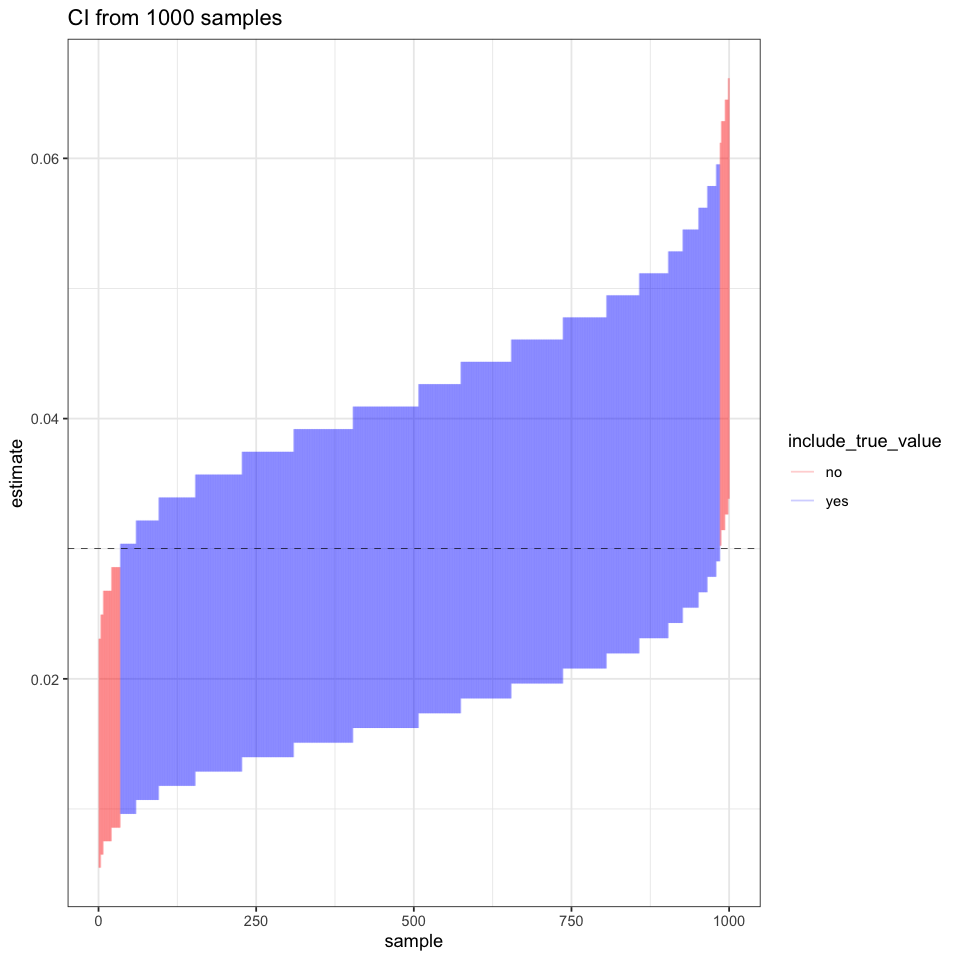

In [166]:
ggplot(dt[se!=0], aes(x=seq, y=y, color=include_true_value)) + 
    geom_errorbar(aes(ymin=lower, ymax=upper), alpha=0.2, width=.1) + 
    theme_bw() + 
    scale_color_manual(values=c('yes'='blue','no'='red')) +
    labs(title='CI from 1000 samples', x='sample', y='estimate') + 
    geom_hline(yintercept=p, color='black', linetype='dashed', size=0.2)

# p-values

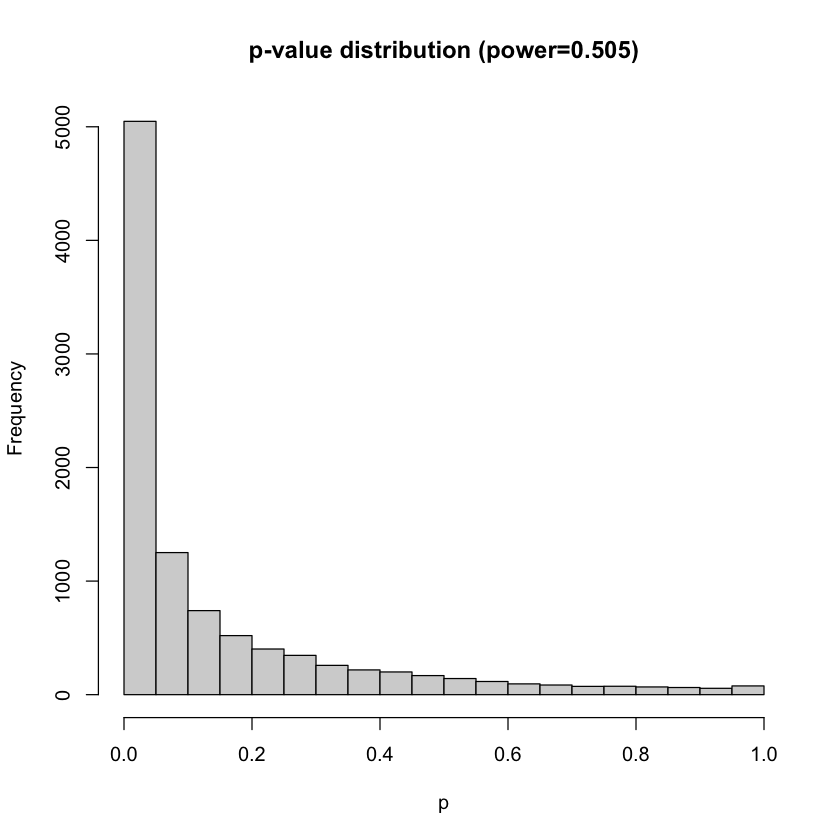

In [12]:
p = NULL # store all simulated *p*-values
nsim = 10000
n = 71
for (i in 1:nsim) { # for each simulated experiment
  x = rnorm(n = n, mean = 100, sd = 15) # Simulate data
  y = rnorm(n = n, mean = 105, sd = 15) # Simulate data
  p = c(p, t.test(x, y)$p.value) # store the *p*-value
}

power = sum(p < 0.05) / nsim # compute power

hist(p, breaks = 20, main = paste0('p-value distribution (power=', round(power, 3), ')')) # plot a histogram

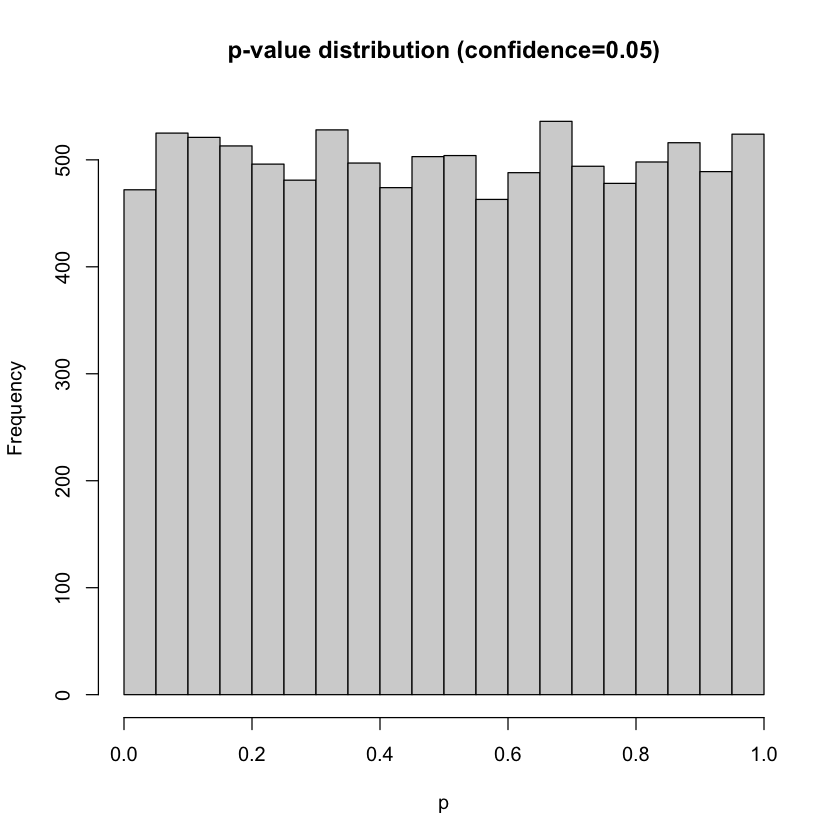

In [14]:
p = NULL # store all simulated *p*-values
nsim = 10000
n = 10000
for (i in 1:nsim) { # for each simulated experiment
  x = rnorm(n = n, mean = 100, sd = 15) # Simulate data
  y = rnorm(n = n, mean = 100, sd = 15) # Simulate data
  p = c(p, t.test(x, y)$p.value) # store the *p*-value
}

confidence = sum(p < 0.05) / nsim # compute power

hist(p, breaks = 20, main = paste0('p-value distribution (confidence=', round(power, 3), ')')) # plot a histogram
